# Домашняя работа №1

Выполнил: Першин Максим

# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="Домашняя-работа-№1-1" href="#Домашняя-работа-№1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашняя работа №1</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Регрессия-с-SVM-(3-балла)-2" href="#Регрессия-с-SVM-(3-балла)"><span class="toc-item-num">2&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Визуализация-данных-(1-балл)-2.1" href="#Визуализация-данных-(1-балл)"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Обучение-моделей-(2-балла)-2.2" href="#Обучение-моделей-(2-балла)"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Определение-языка-слова-(7-баллов)-3" href="#Определение-языка-слова-(7-баллов)"><span class="toc-item-num">3&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Загрузка-(1-балл)-3.1" href="#Загрузка-(1-балл)"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Подготовка-данных-(2-балла)-3.2" href="#Подготовка-данных-(2-балла)"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка данных (2 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Расчет-ядра-(3-балла)-3.3" href="#Расчет-ядра-(3-балла)"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчет ядра (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Оценка-качества-(1-балл)-3.4" href="#Оценка-качества-(1-балл)"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

In [37]:
import pandas as pnd
import numpy as np
from math import log, exp
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
%matplotlib inline

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных и выведите их на графике.

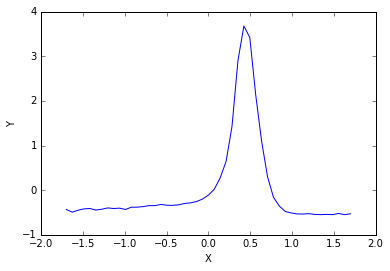

In [47]:
df = pnd.read_csv("titanium.csv")
x = df.x.values.reshape(-1, 1)
y = df.y.values
x = scale(x)
y = scale(y)
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "-")
plt.show()

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

In [51]:
parametres = [0.1, 1, 5, 10, 50]
log_p = [log(c) for c in parametres]

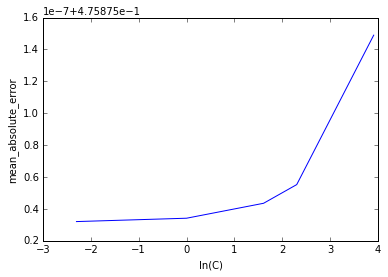

0.47587503205553888

In [52]:
E = []
for i in parametres:
    F = SVR(kernel='linear', C=i, epsilon=0.01).fit(x, y)
    E.append(mean_absolute_error(y, F.predict(x)))
plt.plot(log_p, E, '-')
plt.xlabel('ln(C)')
plt.ylabel('mean_absolute_error')
plt.show()
min(E)

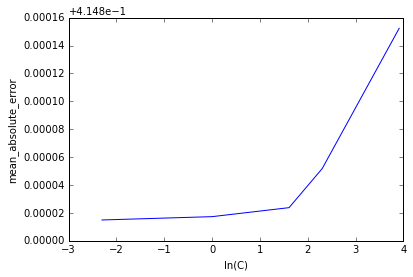

0.41481492892421623

In [53]:
E = []
for i in parametres:
    F = SVR(kernel='poly', C=i, epsilon=0.01, degree=3, gamma=6, coef0=1).fit(x, y)
    E.append(mean_absolute_error(y, F.predict(x)))
plt.plot(log_p, E, '-')
plt.xlabel('ln(C)')
plt.ylabel('mean_absolute_error')
plt.show()
min(E)

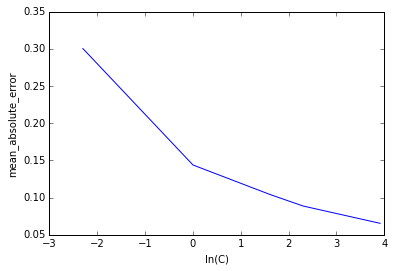

0.065437322076009705

In [55]:
E = []
for i in parametres:
    F = SVR(kernel='rbf', C=i, epsilon=0.01, gamma=6, coef0=1).fit(x, y)
    E.append(mean_absolute_error(y, F.predict(x)))
plt.plot(log_p, E, '-')
plt.xlabel('ln(C)')
plt.ylabel('mean_absolute_error')
plt.show()
min(E)

Следовательно лучшим является rbf-ядро. Его и используем для предсказания значений и cоответствующий параметр С.

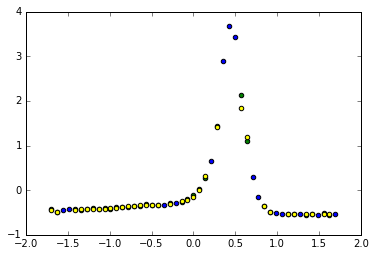

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

ans=SVR(kernel='rbf', gamma= 6, coef0=1, C=50 , epsilon=0.01)
ans.fit(X_train, y_train)
y_predicted=ans.predict(X_train)

plt.plot()
plt.scatter(X_train, y_train, c='g', marker='o')
plt.scatter(X_test, y_test, c='b', marker='o')
plt.scatter(X_train, y_predicted, c='yellow', marker='o')


Видно, что при C=50 достигается хорошее обучение, однако при больших C, его можно улучшить, но возникает опасность переобучения.

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [57]:
eng = pnd.read_csv('war_and_peace_en.txt', header=None)
eng.columns= ['word']
eng["label"] = "1"
ita = pnd.read_csv('war_and_peace_es.txt')
ita.columns= ['word']
ita["label"] = "0"
overal_table = eng.append(ita, ignore_index=True)

## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [58]:
import random
RND_SEED=random.seed(1)
random.random()
t=overal_table.sample(1000, random_state=1)
data_set=t.reset_index(drop=True)
data_set.head()

,word,label
0,gare,0
1,all,1
2,per,0
3,her,1
4,con,0


In [59]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_set.index.values.reshape(-1,1), data_set['label'], test_size=0.4, random_state=1)

## Расчет ядра (3 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


In [21]:
def wfi_levenshtein(string_1, string_2):
    if string_1 == string_2:
        return 0

    len_1 = len(string_1)
    len_2 = len(string_2)

    if len_1 == 0:
        return len_2
    if len_2 == 0:
        return len_1

    if len_1 > len_2:
        string_2, string_1 = string_1, string_2
        len_2, len_1 = len_1, len_2

    d0 = [i for i in range(len_2 + 1)]
    d1 = [j for j in range(len_2 + 1)]

    for i in range(len_1):
        d1[0] = i + 1
        for j in range(len_2):
            cost = d0[j]

            if string_1[i] != string_2[j]:
                # substitution
                cost += 1

                # insertion
                x_cost = d1[j] + 1
                if x_cost < cost:
                    cost = x_cost

                # deletion
                y_cost = d0[j + 1] + 1
                if y_cost < cost:
                    cost = y_cost

            d1[j + 1] = cost

        d0, d1 = d1, d0

    return d0[-1]


C:\Users\Пользователь\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
C:\Users\Пользователь\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


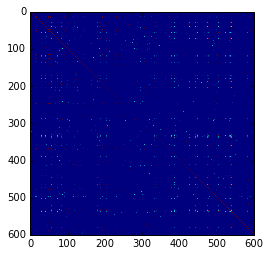

In [60]:
W = list(data_set['word'])
def string_kernel(U, V):
    G = np.zeros((len(V), len(U)))
    for i in range(len(V)):
        for j in range(len(U)):
            w1 = W[U[j]]
            w2 = W[V[i]]
            G[i][j] = exp(-wfi_levenshtein(w1, w2)**2)
    G = np.array(G)
    return G
plt.imshow(string_kernel(X_train, X_train))

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.

In [38]:
for i in [0.01, 0.1, 1, 10]:
    F = SVC(kernel = 'precomputed', C = i).fit(string_kernel(X_train, X_train), y_train)
    print('Точность на тестовой выборке:', accuracy_score(y_train, F.predict(string_kernel(X_train, X_train))))
    print('Точность на контрольной выборке:', accuracy_score(y_test, F.predict(string_kernel(X_train, X_test))))

Точность на тестовой выборке: 0.56
Точность на контрольной выборке: 0.5175
Точность на тестовой выборке: 0.626666666667
Точность на контрольной выборке: 0.5475
Точность на тестовой выборке: 0.995
Точность на контрольной выборке: 0.765
Точность на тестовой выборке: 0.996666666667
Точность на контрольной выборке: 0.7675


C:\Users\Пользователь\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
C:\Users\Пользователь\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


Требуемое значение достигается при C>1